# Анализ тарифов сотовой связи компаниии "Мегалайн"

    Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческому департаменту необходима информация о том , какой тариф приносит больше денег.

    Ниже проведем предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении будут данные 500 пользователей «Мегалайна» за 2018 год: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Необходимо проанализировать поведение клиентов и сделать вывод — какой тариф лучше.



План работы:

1.[Получение данных и получение общей информации](#start)

2.[Подготовка данных](#preprocessing)
*Приведем данные к нужным типам;

*Найдем и исправим ошибки в данных. 

*[приведение данных к нужным типам](#datatype)

*[производство необходимых расчетов](#calculation)

Посчитаем для каждого пользователя: 

*количество сделанных звонков и израсходованных минут разговора по месяцам;

*количество отправленных сообщений по месяцам;

*объем израсходованного интернет-трафика по месяцам;

*помесячную выручку с каждого пользователя.

3.[Анализ данных](#analysis)

Опишем поведение клиентов оператора, исходя из выборки. Утановим, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

4.[Проверка гипотез](#hypotheses)

Проверим гипотезы:

средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

5.[Выводы](#conclusion)


<a id="start"></a>
## Шаг 1. Получение данных и изучение общей информации

импортируем библиотеки pandas, numpy, а также библиотеки matplotlib и seaborn для визуализации, прочитаем файлы с информацией о тарифах и пользователях, сохраним их в соответствующих датафреймах

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
df_calls = pd.read_csv('/datasets/calls.csv')

In [6]:
df_internet = pd.read_csv('/datasets/internet.csv')

In [7]:
df_messages = pd.read_csv('/datasets/messages.csv')

In [8]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [9]:
df_users = pd.read_csv('/datasets/users.csv')

посмотрим общую информацию о полученных датафреймах

In [10]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [11]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [12]:
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [13]:
df_calls.query('duration == 0').count()

id           39613
call_date    39613
duration     39613
user_id      39613
dtype: int64

In [14]:
df_calls.duplicated().sum()

0

In [15]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [16]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [17]:
df_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [18]:
df_internet.query('mb_used == 0').count()

Unnamed: 0      19598
id              19598
mb_used         19598
session_date    19598
user_id         19598
dtype: int64

In [19]:
df_internet.duplicated().sum()

0

In [20]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [21]:
df_messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [22]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [23]:
df_messages.duplicated().sum()

0

In [24]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [25]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [26]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [27]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [28]:
df_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [29]:
df_users['churn_date'].isnull().mean()

0.924

In [30]:
df_users.duplicated().sum()

0

### Выводы

Исходя из полученной информации можно отметить нижеследующее.

Мы будем анализировать датафреймы с нижеследующими данными.

Таблица df_users (информация о пользователях):

user_id — уникальный идентификатор пользователя

first_name — имя пользователя

last_name — фамилия пользователя

age — возраст пользователя (годы)

reg_date — дата подключения тарифа (день, месяц, год)

churn_date — дата прекращения пользования тарифом 

city — город проживания пользователя

tariff — название тарифного плана

Таблица df_calls (информация о звонках):

id — уникальный номер звонка

call_date — дата звонка

duration — длительность звонка в минутах

user_id — идентификатор пользователя, сделавшего звонок

Таблица df_messages (информация о сообщениях):

id — уникальный номер сообщения

message_date — дата сообщения

user_id — идентификатор пользователя, отправившего сообщение

Таблица df_internet (информация об интернет-сессиях):

id — уникальный номер сессии

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

session_date — дата интернет-сессии

user_id — идентификатор пользователя

Таблица df_tariffs (информация о тарифах):

tariff_name — название тарифа

rub_monthly_fee — ежемесячная абонентская плата в рублях

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

rub_per_minute — стоимость минуты разговора сверх тарифного пакета

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета 

Каждая строка таблицы содержит информацию об определенных характеристиках тарифного плана и уникального клиента, который пользуется данным тарифным планом, а также непосредственно статистические сведения о характере использования одного из двух тарифных планов, а именно "Смарт" и "Ультра", конкретным клиентом "Мегалайн". 

На данном этапе мы видим следующие проблемы, которые небходимо решать: логическое несоответствие типов данных определенных столбцов с той информацией, которая в них содержится, а именно по столбцам с указанием дат, идентификатора пользователя, а также количества использованных минут и интернет-траффика. Кроме того,в датафрейме df_internet имеется столбец 'Unnamed: 0', наличие которого вероятнее всего связано с какой-то технической ошибкой.

Также, в столбце duration таблицы df_calls мы наблюдаем большое количество звонков длительностью 0.0 минут, что вероятнее всего является ошибкой данных. Аналогичную картину мы наблюдаем по столбцу с информацией о количестве расходованного интернет-траффика.

Кроме того, в столбце с информацией о дате прекращения пользования тарифом более 92,5 % пропущенных значений, связанных с тем, что на момент выгрузки данных тариф еще действовал, то есть пользовател его использовал.

<a id="preprocessing"></a>

## Шаг 2. Подготовка данных

<a id="datatype"></a>

### Приведение данных к нужным типам, исправление ошибок

Учитывая наличие столбцов с несоответствующими типами данных приведем данные столбцы к соответствующему типу, а имменно даты в формат дат, идентификатор пользователя в тип данных 'object', информацию о длительности звоноков и количестве расходованного траффика в целочисленный тип, так как оператор "Мегалайн" всегда округляет вверх значения минут и мегабайтов. Например, если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута, поэтому наличие знаков после запятой не является необходимостью.

In [31]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')


In [32]:
df_calls['user_id'] = df_calls['user_id'].astype('object')

In [33]:
df_internet['user_id'] = df_internet['user_id'].astype('object')

In [34]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')


In [35]:
df_internet.drop('Unnamed: 0', axis=1, inplace=True)

In [36]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')


In [37]:
df_messages['user_id'] = df_messages['user_id'].astype('object')

In [38]:
df_users['user_id'] = df_users['user_id'].astype('object')

In [39]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')


В случае, если дата прекращения пользования клиента тарифом в рассматриваемом 2018 году отстутствует, то сделаем предположение, что как минимум 01.01.2019 он еще являлся пользователем тарифа, поэтому заменим все пропущенные значения на 01.01.2019.

In [40]:
df_users['churn_date'].fillna('2019-01-01', inplace=True) 


In [41]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')


Учитывая информацию об округлении длительности звонков и размера расходованного интернет-траффика, заменим имеющиеся нулевые значения в данных столбцах на 1, а положительные значения округлим в большую сторону вызовом функции np.cail.

In [42]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil).replace(0, 1)


In [43]:
df_internet['mb_used'] = df_internet['mb_used'].apply(np.ceil).replace(0, 1)

In [44]:
df_calls['duration'] = df_calls['duration'].astype('int')

In [45]:
df_internet['mb_used'] = df_internet['mb_used'].astype('int')

### Выводы

Учитывая наличие столбцов с несоответствующими типами данных мы привели указанные столбцы к соответствующему типу, а имменно даты в формат дат, идентификатор пользователя в тип данных 'object', информацию о длительности звонков и количестве расходованного траффика в целочисленный тип, так как оператор "Мегалайн" всегда округляет вверх значения минут и мегабайт. Также, сделав предположение, что как минимум 01.01.2019 клиент еще являлся пользователем тарифа, мы заменили все пропущенные значения в столбце 'churn_date' на 01.01.2019. Учитывая информацию об округлении длительности звонков и размера расходованного интернет-траффика, мы заменили имеющиеся нулевые значения в  столбцах 'duration' и 'mb_used' на 1, а положительные значения округлили в большую сторону вызовом функции np.cail.

<a id="calculation"></a>

### Производство необходимых расчетов

выведем из даты номер месяца звонка и создадим соответствующий столбец в таблицу df_calls

In [46]:
df_calls['month'] = df_calls['call_date'].dt.month

In [47]:
df_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1,1000,7
1,1000_1,2018-08-17,1,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


создадим сводную таблицу дя расчета длительности и количества звонков для каждого пользователя в разерезе каждого месяца и отобразим данную таблицу

In [48]:
df_calls_pivot = df_calls.pivot_table(index = ['user_id', 'month'], values = ['id', 'duration'], aggfunc = {'id':'count', 'duration':'sum'}).reset_index()

In [49]:
df_calls_pivot.columns =['user_id', 'month', 'duration', 'calls_count']

In [50]:
df_calls_pivot.head(20)

,user_id,month,duration,calls_count
0,1000,5,164,22
1,1000,6,187,43
2,1000,7,346,47
3,1000,8,418,52
4,1000,9,478,58
5,1000,10,363,57
6,1000,11,344,43
7,1000,12,341,46
8,1001,11,444,59
9,1001,12,430,63


проверяем, чтобы суммы значений длительности в свобной таблице и в исходной были равны

In [51]:
df_calls['duration'].sum()

1489914

In [52]:
df_calls_pivot['duration'].sum()

1489914

аналогичным образом выведем месяц из даты отправки сообщения и создадим новый столбец

In [53]:
df_messages['month'] = df_messages['message_date'].dt.month

путем создания сводной таблицы посчитаем количество сообщений в разерезе каждого клиента и месяца отправки

In [54]:
df_messages_pivot = df_messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count').reset_index()

In [55]:
df_messages_pivot.columns =['user_id', 'month', 'messages_count']

In [56]:
df_messages_pivot.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


аналогичным образом выделим месяц использования интернет-траффика из даты его использования и создадим сводную таблицу для подсчета суммы использованного траффика в разрезе каждого клиента и месяца использования

In [57]:
df_internet['month'] = df_internet['session_date'].dt.month

In [58]:
df_internet_pivot = df_internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum').reset_index()

In [59]:
df_internet_pivot.head()

,user_id,month,mb_used
0,1000,5,2257
1,1000,6,23262
2,1000,7,14017
3,1000,8,14072
4,1000,9,14583


аналогично выведем месяц регистрации пользователя из даты его регистрации

In [60]:
df_users['reg_month'] = df_users['reg_date'].dt.month

далее определим диапазон дат регистрации новых клиентов и сгенерируем таблицу, где для каждого клиента будет каждый месяц из полученного диапазона

In [61]:
min_month = df_users['reg_date'].values.astype('datetime64[M]').min()

In [62]:
max_month = df_users['reg_date'].values.astype('datetime64[M]').max()

In [63]:
(min_month, max_month)

(numpy.datetime64('2018-01'), numpy.datetime64('2018-12'))

In [64]:
pd.date_range(min_month,max_month, freq = 'MS')

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [65]:
dm = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))

In [66]:
dm

,0
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


In [67]:
dm.columns = ['month']

In [68]:
dm['month'].dt.month

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: month, dtype: int64

In [69]:
len(df_users)*len(dm)

6000

сейчас методом merge объединим полученную таблицу с месяцами из диапазона дат регистраций клиентов с таблицей df_users, создав для них общий столбец 'key', а также сооздав в результате данного объединения новый датафрейм user_data, где для каждого пользователя будут все 12 месяцев 2018 года

In [70]:
dm['key'] = 1
df_users['key'] = 1

In [71]:
user_data = dm.merge(df_users,on='key')

проверим, чтобы количество строк было равно количеству до объедиения

In [72]:
len(user_data)

6000

посмотрим на отдельно взятого клиента

In [73]:
user_data[user_data['user_id'] == 1499]

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month
499,2018-01-01,1,1499,35,2019-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart,9
999,2018-02-01,1,1499,35,2019-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart,9
1499,2018-03-01,1,1499,35,2019-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart,9
1999,2018-04-01,1,1499,35,2019-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart,9
2499,2018-05-01,1,1499,35,2019-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart,9
2999,2018-06-01,1,1499,35,2019-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart,9
3499,2018-07-01,1,1499,35,2019-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart,9
3999,2018-08-01,1,1499,35,2019-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart,9
4499,2018-09-01,1,1499,35,2019-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart,9
4999,2018-10-01,1,1499,35,2019-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart,9


In [74]:
user_data['month'] = user_data['month'].dt.month

далее созданную таблицу user_data методом merge будем объединять с полученными выше сводными таблицами по общим столбцам 'user_id' и 'month', проверяя также, чтобы сумма значений равнялась сумме до объединения

In [75]:
user_data = user_data.merge(df_internet_pivot,how='left',on=['user_id','month'])

In [76]:
df_internet_pivot['mb_used'].sum()

55389057

In [77]:
user_data['mb_used'].sum()

55389057.0

In [78]:
user_data = user_data.merge(df_calls_pivot,how='left',on=['user_id','month'])

In [79]:
user_data.head()

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,mb_used,duration,calls_count
0,1,1,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN,NaN,NaN
1,1,1,1001,41,2019-01-01,Москва,Иван,Ежов,2018-11-01,smart,11,NaN,NaN,NaN
2,1,1,1002,59,2019-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,NaN,NaN,NaN
3,1,1,1003,23,2019-01-01,Москва,Белла,Белякова,2018-08-17,ultra,8,NaN,NaN,NaN
4,1,1,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,NaN,NaN,NaN


In [80]:
user_data[user_data['user_id'] == 1004]

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,mb_used,duration,calls_count
4,1,1,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,NaN,NaN,NaN
504,2,1,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,NaN,NaN,NaN
1004,3,1,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,NaN,NaN,NaN
1504,4,1,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,NaN,NaN,NaN
2004,5,1,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,13415.0,37.0,9.0
2504,6,1,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,17621.0,177.0,31.0
3004,7,1,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,22246.0,137.0,22.0
3504,8,1,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,28609.0,138.0,19.0
4004,9,1,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,15130.0,125.0,26.0
4504,10,1,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,18498.0,153.0,29.0


In [81]:
df_calls_pivot['duration'].sum()

1489914

In [82]:
user_data['duration'].sum()

1489914.0

In [83]:
user_data = user_data.merge(df_messages_pivot,how='left',on=['user_id','month'])

In [84]:
user_data['messages_count'].sum()

123036.0

In [85]:
df_messages_pivot['messages_count'].sum()

123036

посмотрим наличие пропусков в объединенной таблице

In [86]:
user_data.isna().sum()

month                0
key                  0
user_id              0
age                  0
churn_date           0
city                 0
first_name           0
last_name            0
reg_date             0
tariff               0
reg_month            0
mb_used           2797
duration          2826
calls_count       2826
messages_count    3283
dtype: int64

данные пропуски образовались по тем месяцам, когда клиент еще не являлся пользователем тарифа, поэтому данные пропуски мы оставляем 

In [87]:
df_tariffs.head()


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


рассчитаем для каждого тарифа помесячную выручку с каждого пользователя с учетом условий тарифов, то есть посчитаем перерасход по всем параметрам тарифа и прибавим абонентскую плату.

In [88]:

def out_lim(row):
    if row['tariff'] == 'smart':
        if row['duration'] > 500:
            calls_extra = (row['duration'] - 500)*3
        else:
            calls_extra = 0
        if row['messages_count'] > 50:
            messages_extra = (row['messages_count'] - 50)*3
        else:
            messages_extra = 0
        if row['mb_used'] > 15360:
            mb_extra = (row['mb_used'] - 15360)*(200/1024)
        else:
            mb_extra = 0
        total_cost = messages_extra + calls_extra + mb_extra + 550

    if row['tariff'] == 'ultra':
        if row['messages_count'] > 1000:
            messages_extra = (row['messages_count'] - 1000)*1
        else:
            messages_extra = 0
        if row['duration'] > 3000:
            calls_extra = (row['duration'] - 3000)*1
        else:
            calls_extra = 0
        if row['mb_used'] > 30720:
            mb_extra = (row['mb_used'] - 30720)*(150/1024)
        else:
            mb_extra = 0
        total_cost = messages_extra + calls_extra + mb_extra + 1950
      
    return total_cost

In [89]:
user_data = user_data.query('month >= reg_month')

In [90]:
user_data.fillna(0, inplace = True)

проверим наличие пропусков в полученной таблице

In [91]:
user_data.isna().sum()

month             0
key               0
user_id           0
age               0
churn_date        0
city              0
first_name        0
last_name         0
reg_date          0
tariff            0
reg_month         0
mb_used           0
duration          0
calls_count       0
messages_count    0
dtype: int64

применим данную функцию к таблице user_data и создадим соответствующий столбец с суммами месячной выручки от каждого пользователя

In [92]:
user_data['month_proceeds'] = user_data.apply(out_lim, axis=1)


In [93]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3259 entries, 5 to 5999
Data columns (total 16 columns):
month             3259 non-null int64
key               3259 non-null int64
user_id           3259 non-null int64
age               3259 non-null int64
churn_date        3259 non-null datetime64[ns]
city              3259 non-null object
first_name        3259 non-null object
last_name         3259 non-null object
reg_date          3259 non-null datetime64[ns]
tariff            3259 non-null object
reg_month         3259 non-null int64
mb_used           3259 non-null float64
duration          3259 non-null float64
calls_count       3259 non-null float64
messages_count    3259 non-null float64
month_proceeds    3259 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(5), object(4)
memory usage: 432.8+ KB


In [94]:
user_data.head()

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,mb_used,duration,calls_count,messages_count,month_proceeds
5,1,1,1005,67,2019-01-01,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,1,2730.0,99.0,15.0,7.0,550.000000
32,1,1,1032,31,2019-01-01,Ульяновск,Инна,Игнатьева,2018-01-04,smart,1,24158.0,397.0,61.0,38.0,2268.359375
45,1,1,1045,48,2019-01-01,Улан-Удэ,Джемма,Карасева,2018-01-30,smart,1,2348.0,9.0,1.0,5.0,550.000000
55,1,1,1055,39,2019-01-01,Казань,Луиза,Березина,2018-01-02,smart,1,17115.0,568.0,64.0,30.0,1096.773438
71,1,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,1,15625.0,200.0,24.0,16.0,601.757812


In [95]:
user_data[user_data['user_id'] == 1004]

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,mb_used,duration,calls_count,messages_count,month_proceeds
2004,5,1,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,13415.0,37.0,9.0,95.0,1950.0
2504,6,1,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,17621.0,177.0,31.0,134.0,1950.0
3004,7,1,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,22246.0,137.0,22.0,181.0,1950.0
3504,8,1,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,28609.0,138.0,19.0,151.0,1950.0
4004,9,1,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,15130.0,125.0,26.0,146.0,1950.0
4504,10,1,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,18498.0,153.0,29.0,165.0,1950.0
5004,11,1,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,15634.0,121.0,19.0,158.0,1950.0
5504,12,1,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,18041.0,136.0,21.0,162.0,1950.0


### Выводы

Из столбцов со значениями дат расхода интернет-траффика, совершения звонка, отправки сообщения и регистрации пользователя мы извлекли значение месяца, создав соответствующие столбцы 'month' в рассматриваемых таблицах. Также, путем формирования сводных таблиц, мы рассчитали для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам.Далее мы определили диапазон дат регистрации новых клиентов и сгенерировали таблицу, где каждому клиенту присвоен каждый месяц из полученного диапазона, то есть 12 месяцев 2018 года. После этого, методом merge объединили полученную таблицу, состояющую из 12 месяцев 2018 года, с таблицей df_users, создав для них общий столбец 'key', а также сооздав в результате данного объединения новый датафрейм user_data, где  каждому пользователю присвоены все 12 месяцев 2018 года. Далее, созданную таблицу user_data методом merge  объединили с полученными выше сводными таблицами по общим столбцам 'user_id' и 'month'. Мы также рассчитали для каждого тарифа помесячную выручку с каждого пользователя с учетом условий тарифов, то есть посчитали перерасход по всем параметрам тарифа и прибавили абонентскую плату.

<a id="analysis"></a>

## Шаг 3. Анализ данных

создадим категории городов, где живут клиенты, выделив 2 столицы и "другие"

In [96]:
user_data['city'].unique()

array(['Набережные Челны', 'Ульяновск', 'Улан-Удэ', 'Казань', 'Омск',
       'Чита', 'Краснодар', 'Санкт-Петербург', 'Красноярск',
       'Архангельск', 'Ставрополь', 'Кострома', 'Волгоград', 'Тамбов',
       'Москва', 'Киров', 'Ростов-на-Дону', 'Уфа', 'Вологда', 'Пенза',
       'Магнитогорск', 'Иркутск', 'Орёл', 'Астрахань', 'Подольск',
       'Ярославль', 'Новокузнецк', 'Нижний Тагил', 'Мурманск', 'Самара',
       'Воронеж', 'Пермь', 'Саранск', 'Новосибирск', 'Владивосток',
       'Нижний Новгород', 'Новороссийск', 'Брянск', 'Челябинск',
       'Калининград', 'Барнаул', 'Якутск', 'Тольятти', 'Курган', 'Томск',
       'Балашиха', 'Саратов', 'Петрозаводск', 'Тюмень', 'Курск', 'Тула',
       'Сочи', 'Калуга', 'Оренбург', 'Смоленск', 'Хабаровск', 'Рязань',
       'Махачкала', 'Тверь', 'Ижевск', 'Чебоксары', 'Белгород',
       'Череповец', 'Стерлитамак', 'Владимир', 'Волжский', 'Екатеринбург',
       'Севастополь', 'Нижневартовск', 'Грозный', 'Владикавказ', 'Химки',
       'Сургут', 'Липе

In [97]:
def categorize_city(row):      
    
    city_name = row['city']
    
    if city_name == "Москва":
        return 'Москва'
    
    if city_name == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    
    return 'другие'
 
user_data['city_category'] = user_data.apply(categorize_city, axis = 1)

аналогично поделим на категории возраст клиентов

In [98]:
def age_group(row):
    age = row['age']

    if age <= 30:
        return 'молодежь'

    if 30 < age <= 55:
        return 'средний возраст'
    if age > 55:
        return 'пожилой возраст'

user_data['age_group'] = user_data.apply(age_group, axis=1)

сделаем срез данных только по тарифу смарт  

In [99]:
smart_user_data = user_data.query('tariff == "smart"')


посмотрим статистические данные по интересующим столбцам  тарифа "смарт" методом describe()

In [100]:
smart_user_data[['duration', 'messages_count', 'mb_used', 'month_proceeds']].describe()

,duration,messages_count,mb_used,month_proceeds
count,2253.000000,2253.000000,2253.000000,2253.000000
mean,424.876165,33.028407,16064.218375,1243.937927
std,198.782842,28.285544,6081.393615,796.708149
min,0.000000,0.000000,0.000000,550.000000
25%,285.000000,9.000000,12520.000000,550.000000
50%,433.000000,28.000000,16464.000000,979.000000
75%,559.000000,51.000000,20041.000000,1681.500000
max,1471.000000,143.000000,38627.000000,6768.335938


в указанной таблице мы можем наблюдать средние значения (mean) и стандартные отклоенния (std) по интересующим столбцам

также поизведем расчет дисперсии для указанных столбцов. Так как нам известно, что рассматриваемый датасет — не вся совокупность, а выборка из неё, вместо дисперсии мы считаем её оценку по имеющейся выборке (то есть s², а не σ²). Для этого в методе var() указываем параметр ddof=1 :

In [101]:
variance_smart = np.var(smart_user_data[['duration', 'messages_count', 'mb_used', 'month_proceeds']], ddof=1)

In [102]:
variance_smart

duration          3.951462e+04
messages_count    8.000720e+02
mb_used           3.698335e+07
month_proceeds    6.347439e+05
dtype: float64

стандартное отклонение также можно посчитать и таким способом

In [103]:
std_smart = np.std(smart_user_data[['duration', 'messages_count', 'mb_used', 'month_proceeds']], ddof=1)


In [104]:
std_smart

duration           198.782842
messages_count      28.285544
mb_used           6081.393615
month_proceeds     796.708149
dtype: float64

создаем срез по тарифу "ультра" и производим аналогичные вычисления

In [105]:
ultra_user_data = user_data.query('tariff == "ultra"')


In [106]:
ultra_user_data[['duration', 'messages_count', 'mb_used', 'month_proceeds']].describe()

,duration,messages_count,mb_used,month_proceeds
count,1006.000000,1006.000000,1006.000000,1006.000000
mean,529.491054,48.333002,19081.881710,2058.282823
std,331.469116,47.826442,10372.651529,353.039349
min,0.000000,0.000000,0.000000,1950.000000
25%,279.250000,5.000000,11297.000000,1950.000000
50%,524.000000,37.000000,19035.500000,1950.000000
75%,767.500000,78.000000,26693.750000,1950.000000
max,1727.000000,224.000000,49793.000000,4743.896484


In [107]:
variance_ultra = np.var(ultra_user_data[['duration', 'messages_count', 'mb_used', 'month_proceeds']], ddof=1)

In [108]:
variance_ultra

duration          1.098718e+05
messages_count    2.287369e+03
mb_used           1.075919e+08
month_proceeds    1.246368e+05
dtype: float64

посмотрим значения коэффициентов корреляции по рассматриваемым переменным

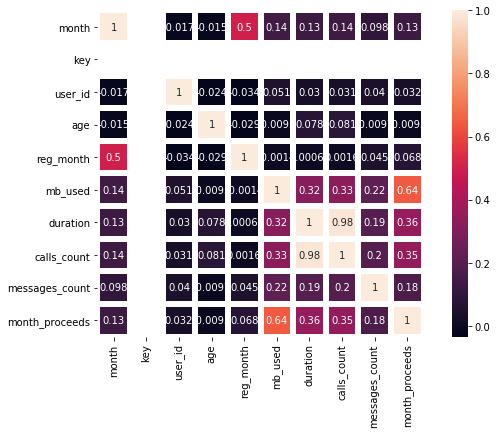

In [109]:
user_data_corr = user_data.corr()
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sns.heatmap(user_data_corr, square=True, linewidths=5, annot=True);

мы наблюдаем достаточно высокую зависимость месячной выручки от количества использованного траффика, чуть ниже от длительности и количества звонков, и еще ниже от количества сообщений. Наличие высокого показателя коэффициента корреляции по данным парам вполне ожидаемо. Вместе с тем, мы также видим достаточно сильную связь между количеством и длительностью звонков и количеством использованного траффика, а также связь между количеством сообщений и звонками, а также траффиком.

сравним количество клиентов в обоих тарифах

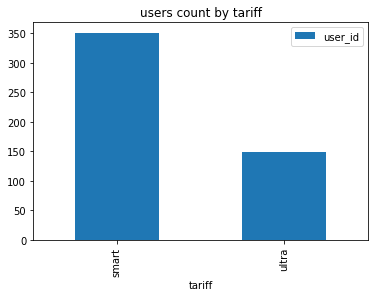

In [110]:
user_data.pivot_table(index = 'tariff', values = 'user_id', aggfunc = lambda x: len(x.unique())).plot.bar(title = 'users count by tariff');

мы видим, что количество пользователей тарифа "смарт" значительно выше, чем аналогичный показатель тарифа "ультра", в частности примерно 350 на 150 человек.

посмтрим средний возраст пользователей обоих тарифов

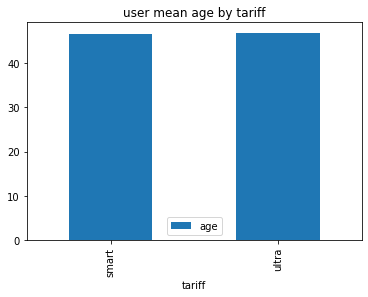

In [111]:
user_data.pivot_table(index = 'tariff', values = 'age', aggfunc = 'mean').plot.bar(title = 'user mean age by tariff');

мы видим, что средний возраст практически не отличается и находится на уровне 45-47 лет.

посмотрим на процентное содержание категорий возрастов клиентов по каждому тарифу

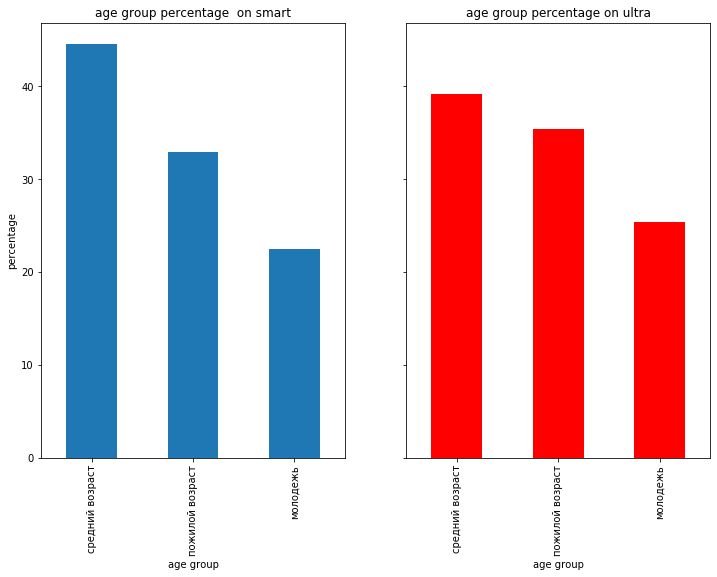

In [112]:
s_age = smart_user_data['age_group'].value_counts(normalize = True)*100
u_age = ultra_user_data['age_group'].value_counts(normalize = True)*100
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
s_age.plot.bar(ax=ax[0])
u_age.plot.bar(ax=ax[1], color='r')                   
ax[0].set(title='age group percentage  on smart', xlabel= 'age group', ylabel = 'percentage')
ax[1].set(title='age group percentage on ultra', xlabel='age group', ylabel = 'percentage');

Мы видим, что обоими тарифами преобладающе пользуются люди среднего возраста, а именно более 40 %, более 30% пользователей обоих тарифов - это пожилые люди, а остальные - молодежь. Различия по тарифам имеются, но незначительные.

далее посмотрим, жители каких городов преобладающе являются пользователями обоих тарифов

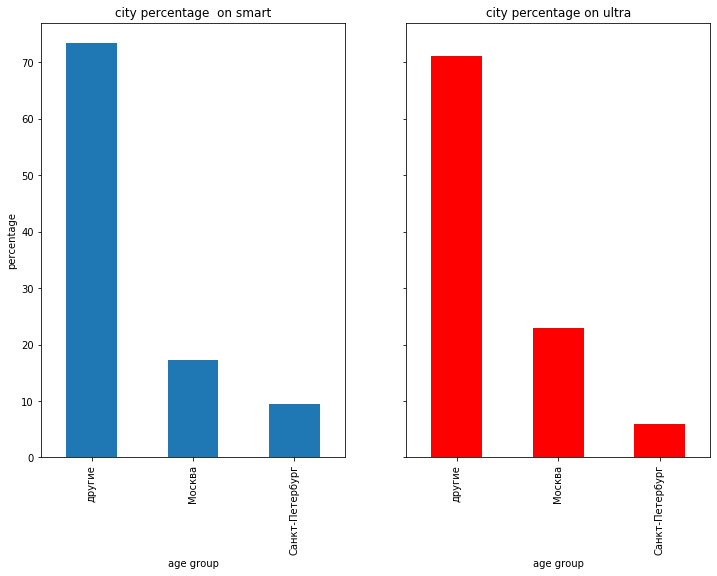

In [113]:
s_city = smart_user_data['city_category'].value_counts(normalize = True)*100
u_city = ultra_user_data['city_category'].value_counts(normalize = True)*100
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
s_city.plot.bar(ax=ax[0])
u_city.plot.bar(ax=ax[1], color='r')                   
ax[0].set(title='city percentage  on smart', xlabel= 'age group', ylabel = 'percentage')
ax[1].set(title='city percentage on ultra', xlabel='age group', ylabel = 'percentage');

в рассматриваемой выборке большинство пользователей по обоим тарифов из других городов, а именно более 70%,  пользователей из Москвы около 20%, остальные, соответственно - жители северной столицы. Опять же, различия по тарифам имеются, но незначительные.

далее, используя цикл, построим гистограммы по интересующим столбцам, а именно длительность звонка, количество сообщений, количество использованного интернет-траффика, месячная выручка по каждому пользователю, при этом значения будут находится в интервале с учетом "минимума" и "максимума", после которых будут находится редкие значения.

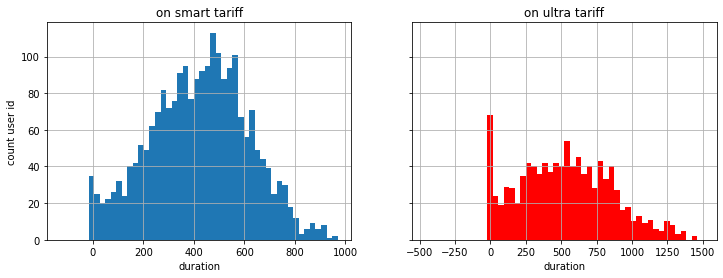

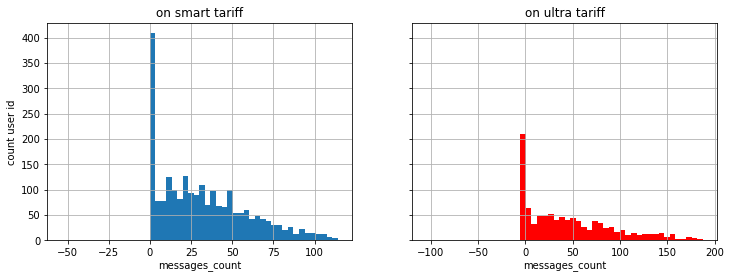

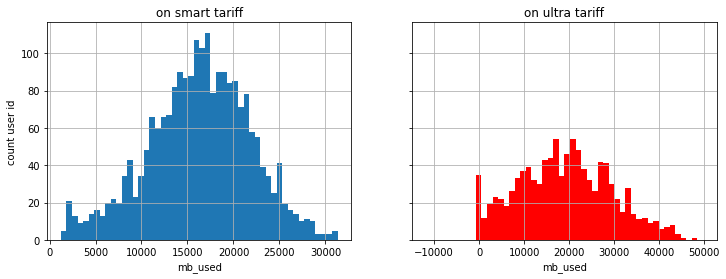

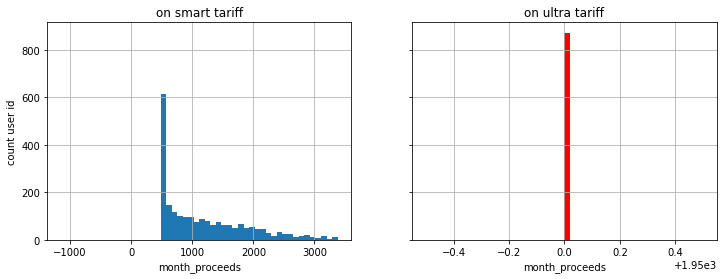

In [114]:
for column in ['duration', 'messages_count', 'mb_used', 'month_proceeds']:
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
    Q1=smart_user_data[column].quantile(0.25)
    Q3=smart_user_data[column].quantile(0.75)
    IQR=Q3-Q1
    Q1_1=ultra_user_data[column].quantile(0.25)
    Q3_1=ultra_user_data[column].quantile(0.75)
    IQR_1=Q3_1-Q1_1
    smart_user_data[column].plot(kind = 'hist', ax=ax[0], bins = 50, range=(Q1-1.5*IQR, Q3+1.5*IQR), grid = True)
    ultra_user_data[column].plot(kind = 'hist', ax=ax[1], bins = 50, color='r', range=(Q1_1-1.5*IQR_1, Q3_1+1.5*IQR_1), grid=True)                   
    ax[0].set(title= 'on smart tariff', xlabel=column, ylabel = 'count user id')
    ax[1].set(title= 'on ultra tariff', xlabel=column, ylabel = 'count user id');
  

чтобы более наглядно видеть редкие значения, для указанных стобцов также построим "ящики с усами".

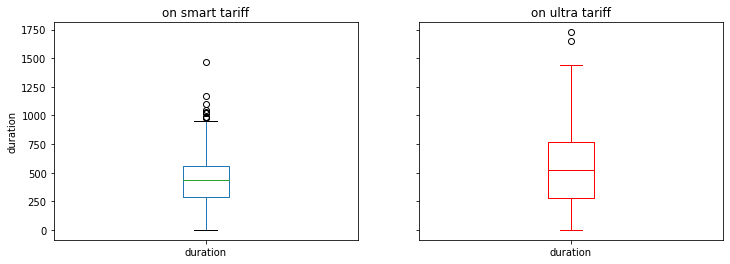

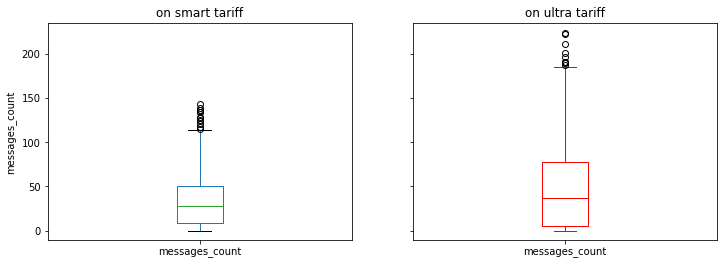

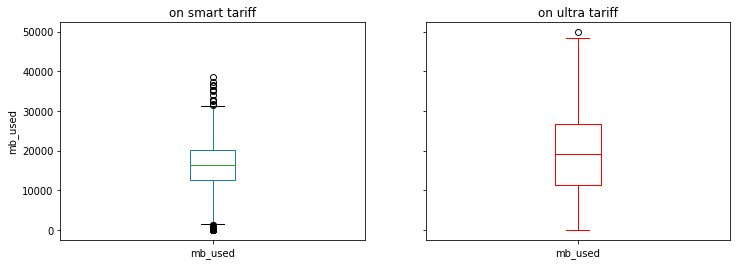

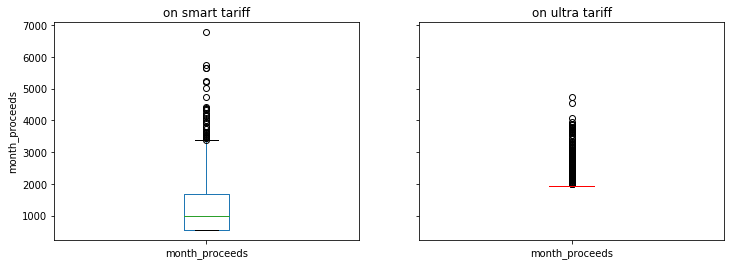

In [115]:
for column in ['duration', 'messages_count', 'mb_used', 'month_proceeds']:
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
    
    smart_user_data[column].plot(kind = 'box', ax=ax[0])
    ultra_user_data[column].plot(kind = 'box', ax=ax[1], color='r')                   
    ax[0].set(title= 'on smart tariff', ylabel = column)
    ax[1].set(title= 'on ultra tariff',  ylabel = column);

Исходя из полученных графиков можно сделать следующие выводы. Так, большинство пользователей тарифа "Смарт"в месяц совершают звонки  общей длительностью от 285 до 559 мин. На ящике с усами мы наблюдаем, что редкие значения по данной переменной начинаются приблизительно с 970 минут и выше. Для пользователей тарифа "Ультра" этот диапазон составляет  от 279 до 767, а редкие значения начинаются примерно с 1450 мин. 

Касаемо ежемесячного количества сообщений, то для тарифа "Смарт" можно отметить, что большинство пользователей данного тарифа ежемесячно отправляют в общей сложности от 9 до 51 сообщений, при этом редкие значения начинаются примерно со 115 сообщений. Для пользователей тарифа "Ультра" межквартальный размах составил от 5 до 78 сообщений, а редкие значения начинаются примерно после 180 сообщений.

В части использования интернет-траффика пользователями обоих опереторов можно отметить следюущее. Так, большинство пользователей тарифа "Смарт"  ежемесячно используют от 12 520 до 20 041 мб, редкие значения начинаются приблизительно с  31 000 мб. Для пользователей тарифа "Ультра" характерен межквартальный размах от 11 300 до 26 700 мб, а редкие значения начинаются с 49 000 мб.

В части месячной выручки по клиенту в зависимости от тарифа мы наблюдаем следующую ситуацию. Месячная выручка от клиентов, пользующихя тарифом "смарт", в большинстве случаев находится в диапазоне от 550 до 1680, при этом редкие значения начинаются примерно с 3 500 руб. Пользователи тарифа "ультра" в большинстве своем не выходят за пределы тарифа и приносят месячную выручку в сумме 1950, то есть сумму, равную абонентской плате, при этом суммы выше 2000 уже являются редкостью.


посмотрим динамику среднего потребления интернет-траффика по месяцам по обоим тарифам

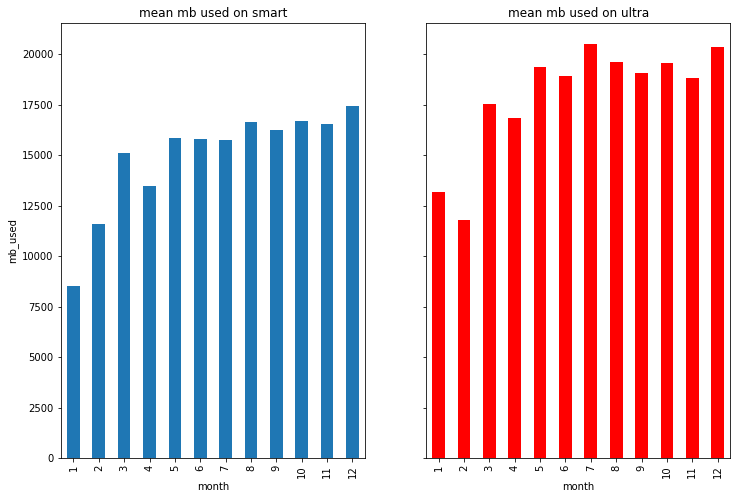

In [116]:
s_gb = smart_user_data.groupby('month')['mb_used'].mean()
u_gb = ultra_user_data.groupby('month')['mb_used'].mean()
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
s_gb.plot.bar(ax=ax[0])
u_gb.plot.bar(ax=ax[1], color='r')                   
ax[0].set(title='mean mb used on smart', xlabel= 'month', ylabel = 'mb_used')
ax[1].set(title='mean mb used on ultra', xlabel='month', ylabel = 'mb_used');

мы видим, что по обоим тарифам в течение года вцелом среднее потребление траффика возрастает, при этом среднее потребление траффика пользователями тарифа "ультра" выше, чем у пользователей тарифа "смарт"

аналогичным образом посмотрим на динамику среднего количества отправленных сообщений в течение года пользователями рассматриваемых тарифов

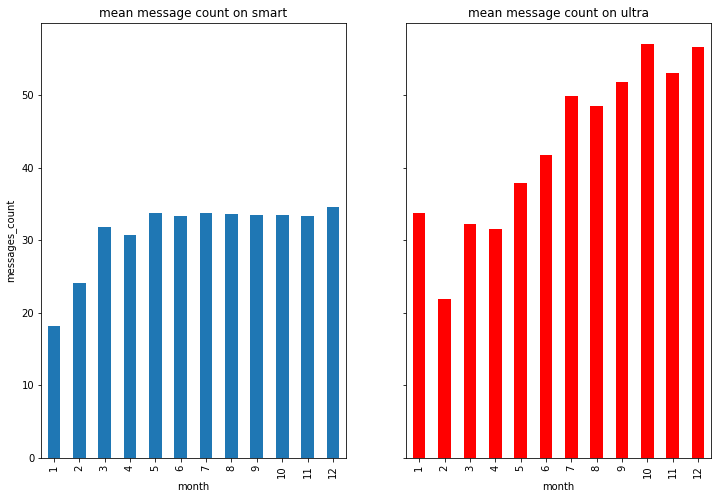

In [117]:
s_messages = smart_user_data.groupby('month')['messages_count'].mean()
u_messages = ultra_user_data.groupby('month')['messages_count'].mean()
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
s_messages.plot.bar(ax=ax[0])
u_messages.plot.bar(ax=ax[1], color='r')                   
ax[0].set(title='mean message count on smart', xlabel= 'month', ylabel = 'messages_count')
ax[1].set(title='mean message count on ultra', xlabel='month', ylabel = 'messages_count');

мы видим, что пользователи тарифа "смарт" в среднем отправляют существенно меньше сообщений, чем пользователи тарифа "ультра", при этом существенная положительная динамика по тарифу "смарт" наблюдается лишь в начале года,в то время как по тарифу "ультра" рост количества сообщений наблюдается практически в течение всего года

аналогчным образом посмотрим на динамику суммарной средней продолжительности звоноков ежемесячно  в течение года пользователями рассматриваемых тарифов

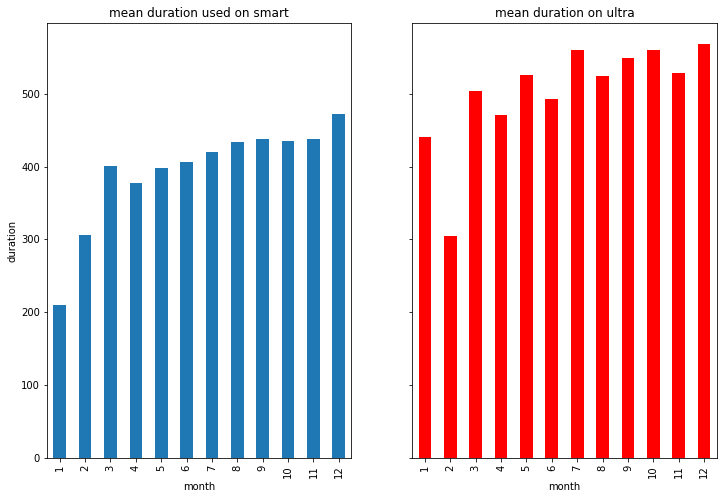

In [118]:
s_duration = smart_user_data.groupby('month')['duration'].mean()
u_duration = ultra_user_data.groupby('month')['duration'].mean()
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
s_duration.plot.bar(ax=ax[0])
u_duration.plot.bar(ax=ax[1], color='r')                   
ax[0].set(title='mean duration used on smart', xlabel= 'month', ylabel = 'duration')
ax[1].set(title='mean duration on ultra', xlabel='month', ylabel = 'duration');

мы видим, что пользователи тарифа "ультра" и общаются на порядок продолжительнее, чем пользователи тарифа "смарт", при этом по обоим тарифам мы наблюдаем, хоть и с перепадами, но положительную динамику в течение года

посмотрим на динамику месячной средней выручки  от каждого пользователя в течение всего года по обоим тарифам

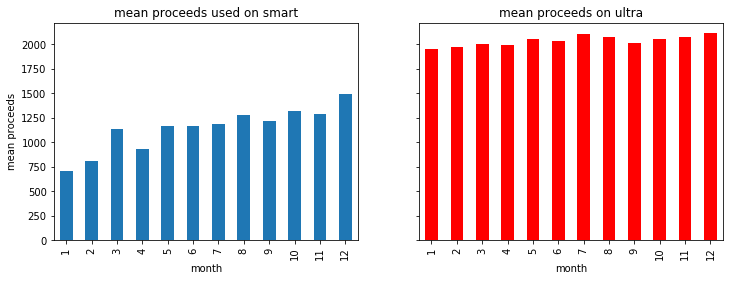

In [119]:
s_proceeds = smart_user_data.groupby('month')['month_proceeds'].mean()
u_proceeds = ultra_user_data.groupby('month')['month_proceeds'].mean()
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
s_proceeds.plot.bar(ax=ax[0])
u_proceeds.plot.bar(ax=ax[1], color='r')                   
ax[0].set(title='mean proceeds used on smart', xlabel= 'month', ylabel = 'mean proceeds')
ax[1].set(title='mean proceeds on ultra', xlabel='month', ylabel = 'mean proceeds');

мы видим, что средняя месячная выручка, полученная от каждого пользователя тарифа "ультра" существенно выше, чем от пользователей тарифа "смарт", при этом по тарифу "ультра" резких изменений среднего размера  месячной выручки не наблюдается, в то время как па тарифу "смарт" вцелом наблюдается переменчивая динамика в течение года, но все же динамика положительная.

соответственно, посмотрим также динамику суммарной месячной выручки по каждому тарифу в течение года

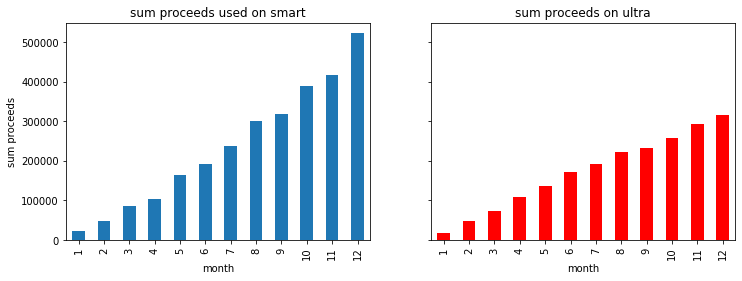

In [120]:
s = smart_user_data.groupby('month')['month_proceeds'].sum()
u  = ultra_user_data.groupby('month')['month_proceeds'].sum()
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
s.plot.bar(ax=ax[0])
u.plot.bar(ax=ax[1], color='r')                   
ax[0].set(title='sum proceeds used on smart', xlabel= 'month', ylabel = 'sum proceeds')
ax[1].set(title='sum proceeds on ultra', xlabel='month', ylabel = 'sum proceeds');

по обоим тарифам наблюдаем положительную динамику, при этом общая сумма выручки, получаемая ежемесячно от пользователей тарифа "смарт", существенно выше, чем по тарифу "ультра", вероятнее всего сказывается разница в количестве абонентов по данным группам. 

посмотрим также разницу сумм ежемесячных выручек по категориям городов

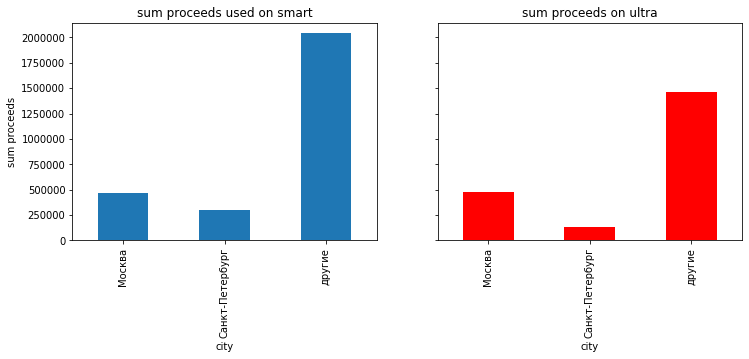

In [121]:
s_p = smart_user_data.groupby('city_category')['month_proceeds'].sum()
u_p  = ultra_user_data.groupby('city_category')['month_proceeds'].sum()
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
s_p.plot.bar(ax=ax[0])
u_p.plot.bar(ax=ax[1], color='r')                   
ax[0].set(title='sum proceeds used on smart', xlabel= 'city', ylabel = 'sum proceeds')
ax[1].set(title='sum proceeds on ultra', xlabel='city', ylabel = 'sum proceeds');

### Выводы

В ходе проведения анализа мы описали поведение клиентов оператора, исходя из выборки. Определили количество минут разговора, сообщений и  объём интернет-трафика, которые требуются пользователям каждого тарифа в месяц. Посчитали среднее количество, дисперсию и стандартное отклонение по данным параметрам, включая месячную выручку для пользователя каждого из 2 тарифов. Всю полученную информацию отразили в графическом виде, в том числе информацию о динамике различных поаказателей, сгрупированных по другому показателю.

Так, путем создания тепловой карты для определения попарной корреляции интересующих столбцов, мы обнаружили достаточно высокую зависимость месячной выручки от количества использованного траффика, чуть ниже от длительности и количества звонков, и еще ниже от количества сообщений. Также мы обнаружили достаточно сильную связь между количеством и длительностью звонков и количеством использованного траффика, а также связь между количеством сообщений и звонками, а также траффиком.

Мы обнаружили, что количество пользователей тарифа "смарт" значительно выше, чем аналогичный показатель тарифа "ультра".

Также мы обнаружили, что средний возраст пользователей обоих тарифов практически не отличается и находится на уровне 45-47 лет.

Мы увидели, что обоими тарифами преобладающе пользуются люди среднего возраста, а именно более 40 %, более 30% пользователей обоих тарифов - это пожилые люди, а остальные - молодежь. Различия по тарифам имеются, но незначительные.

Также, предварительно разделив населенные пункты, где живут пользователи рассматриваемых тарифов, на категории, а именно "Москва, Санкт-Петербург и другие", нами установлено, что в рассматриваемой выборке большинство пользователей по обоим тарифов из других городов, а именно более 70%,  пользователей из Москвы около 20%, остальные, соответственно - жители северной столицы. Опять же, различия по тарифам имеются, но незначительные.

Используя цикл, мы построили гистограммы по инересующим столбцам, а именно длительность звонка, количество сообщений, количество использованного интернет-траффика, месячная выручка по каждому пользователю, при этом значения находятся в интервале с учетом "минимума" и "максимума", то есть редкие значения не отражались, их мы отразили, создав "ящики с усами" для данных столбцов.

Далее,исходя из полученных графиков мы сделали следующие выводы. Так, большинство пользователей тарифа "Смарт"в месяц совершают звонки общей длительностью от 285 до 559 мин. На ящике с усами мы наблюдаем, что редкие значения по данной переменной начинаются приблизительно с 970 минут и выше. Для пользователей тарифа "Ультра" этот диапазон составляет от 279 до 767, а редкие значения начинаются примерно с 1450 мин.

Касаемо ежемесячного количества сообщений, то для тарифа "Смарт" можно отметить, что большинство пользователей данного тарифа ежемесячно отправляют в общей сложности от 9 до 51 сообщений, при этом редкие значения начинаются примерно со 115 сообщений. Для пользователей тарифа "Ультра" межквартальный размах составил от 5 до 78 сообщений, а редкие значения начинаются примерно после 180 сообщений.

В части использования интернет-траффика пользователями обоих опереторов можно отметить следюущее. Так, большинство пользователей тарифа "Смарт" ежемесячно используют от 12 520 до 20 041 мб, выбросы начинаются приблизительно с 31 000 мб. Для пользователей тарифа "Ультра" характерен межквартальный размах от 11 300 до 26 700 мб, а редкие значения начинаются с 49 000 мб.

В части месячной выручки по клиенту в зависимости от тарифа мы наблюдаем следующую ситуацию. Месячная выручка от клиентов, пользующихя тарифом "смарт", в большинстве случаев находится в диапазоне от 550 до 1680, при этом редкие значения начинаются примерно с 3 500 руб. Пользователи тарифа "ультра" в большинстве своем не выходят за пределы тарифа и приносят месячную выручку в сумме 1950 руб., то есть сумму, равную абонентской плате, при этом суммы выше 2000 уже являются редкостью.


После этого мы группировали данные и отображали результаты вграфическом виде. В итоге нами установлены нижеследующие особенности.

Так,по обоим тарифам в течение года вцелом среднее потребление интернет- траффика возрастает, при этом среднее потребление траффика пользователями тарифа "ультра" выше, чем у пользователей тарифа "смарт".

Также мы увидели, что пользователи тарифа "смарт" в среднем отправляют существенно меньше сообщений, чем пользователи тарифа "ультра", при этом существенная положительная динамика по тарифу "смарт" наблюдается лишь в начале года,в то время как по тарифу "ультра" рост количества сообщений наблюдается практически в течение всего года.

Мы обнаружили, что пользователи тарифа "ультра" и общаются на порядок продолжительнее, чем пользователи тарифа "смарт", при этом по обоим тарифам мы наблюдаем, хоть и с перпадами, но положительную динамику в течение года.

Мы увидели, что средняя месячная выручка, полученная от каждого пользователя тарифа "ультра", существенно выше, чем от пользователей тарифа "смарт", при этом по тарифу "ультра" резких изменений среднего размера  месячной выручки не наблюдается, в то время как па тарифу "смарт" вцелом наблюдается изменчивая динамика в течение года.

Также, по обоим тарифам мы наблюдаем положительную динамику, при этом общая сумма выручки, получаемая ежемесячно от пользователей тарифа "смарт", существенно выше, чем по тарифу "ультра", вероятнее всего сказывается разница в количестве абонентов по данным группам. 

Кроме того, установлено, больше всего денежных средств получено со стороны жителей "других" городов, далее идет Москва, после чего Санкт-Петербург, при этом по тарифу "ультра" от жителей северной столицы поступило значительно меньше денежных средств, чем от жителей Москвы, в то время как по тарифу "смарт" данная разница не так существенна.

<a id="hypotheses"></a>

## Шаг.4 Проверка гипотез

Проверим гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Здесь мы выясняем, есть ли разница между совокупностями, поэтому нулевая гипотеза должна быть такая: «нет, разницы нет, то есть исследуемые параметры равны». Исходя из этого ниже следуют нулевая и альтернативная гипотезы, альтернативная, соответсвтенно, прямо противоположная.

H0 - средняя выручка пользователей тарифов "Ультра" и "Смарт" не различается.

H1 - средняя выручка пользователей тарифов "Ультра" и "Смарт" различается.

создадим 2 датасета со значениями выручки по каждому тарифу

In [122]:
smart_proceeds = smart_user_data['month_proceeds']
ultra_proceeds = ultra_user_data['month_proceeds']


Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var).  Мы выбрали один из параметрическиз критериев значимости, которые служат для проверки гипотез о параметрах распределений, в частности t-критерий Стьюдента для независимых выборок.

критический уровень статистической значимости примем за 5%.При выборе уровня значимости мы исходили из практических соображений и посчитали такой критический уровень статистической значимости достаточным. 

In [123]:
from scipy import stats as st
alpha = 0.05 


In [124]:
variance_smart_proceeds = np.var(smart_proceeds, ddof=1)
variance_ultra_proceeds = np.var(ultra_proceeds, ddof=1)

In [125]:
variance_smart_proceeds


634743.8744152953

In [126]:
variance_ultra_proceeds

124636.78216202698

In [127]:
variance_tariff_difference = ((variance_ultra_proceeds-variance_smart_proceeds)/variance_smart_proceeds)*100

In [128]:
variance_tariff_difference

-80.36424025724736

мы видим, что разница составляет более 80%

In [129]:
 results = st.ttest_ind(
    smart_proceeds, 
    ultra_proceeds, equal_var = False)

In [130]:
print('p-значение:', results.pvalue)


p-значение: 4.957899032144109e-290


In [131]:
if (results.pvalue < alpha):
    print("Средняя выручка пользователей тарифов Ультра и Смарт различается, так как значение статистичекой значимости меньше критического уровня статистической  значимости, поэтому мы можем опровергнуть нулевую гипотезу.")
else:
    print("Средняя выручка пользователей тарифов Ультра и Смарт не различается, так как значение статистической значимости больше критического уровня статистической  значимости, поэтому мы не можем опровергнуть нулевую гипотезу.")

Средняя выручка пользователей тарифов Ультра и Смарт различается, так как значение статистичекой значимости меньше критического уровня статистической  значимости, поэтому мы можем опровергнуть нулевую гипотезу.


*То есть, вероятность того, что существующая разница между средними выручками 2 тарифов является случайностью, крайне мала. Эта вероятность позволяет сделать вывод о значимом различии между средними выручками.*

Проверим гипотезу, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Расчеты проведем аналогичные вышепроведенным, так как в данном случае отличие лишь в том, что клиенты разделены по признаку принадлжености к местности, а не к тарифу.

H0 - средняя выручка пользователей из Москвы и других регионов не различается.

H1 - средняя выручка пользователей из Москвы и других регионов различается.

In [132]:
moscow_proceeds = user_data.query("city == 'Москва'")['month_proceeds']
other_proceeds = user_data.query("city != 'Москва'")['month_proceeds']

аналогичным образом сравним дисперсии рассматриваемых выборок

In [133]:
variance_moscow_proceeds = np.var(moscow_proceeds, ddof=1)
variance_other_proceeds = np.var(other_proceeds, ddof=1)

In [134]:
variance_moscow_proceeds

547423.2407466922

In [135]:
variance_other_proceeds

635510.9917224266

In [136]:
variance_city_difference = ((variance_other_proceeds-variance_moscow_proceeds)/variance_moscow_proceeds)*100

In [137]:
variance_city_difference

16.091342935236298

разница составляет более 5%, поэтому equal_var также примем равным False

In [138]:
alpha = 0.05

In [139]:
 results = st.ttest_ind(
    moscow_proceeds, 
    other_proceeds, equal_var = False)

In [140]:
print('p-значение:', results.pvalue)


p-значение: 0.4020744707525923


In [141]:
if (results.pvalue < alpha):
    print("Средняя выручка пользователей Москвы отличается от выручки пользователей из других регионов, так как значение статистической значимости меньше критического уровня, поэтому можем опровергнуть нулевую гипотезу.")
else:
    print("Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, так как значение статистической значимости больше критического уровня статистической  значимости, и мы не можем опровергнуть нулевую гипотезу.")

Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, так как значение статистической значимости больше критического уровня статистической  значимости, и мы не можем опровергнуть нулевую гипотезу.


*Полученный результат говорит о том, что хотя средняя выручка, получаемая от клиентов из Москвы и других городов, может быть неодинаковой, с вероятностью более 40% это различие можно получить случайно, то есть это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками по рассматриваемым выборкам.*

### Выводы

В процессе выполнения данного шага мы проверили следующие гипотезы: 

средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Чтобы проверить данные гипотезы мы применили метод scipy.stats.ttest_ind().  Мы выбрали один из параметрических критериев значимости, которые служат для проверки гипотез о параметрах распределений, в частности t-критерий Стьюдента для независимых выборок.

По результатам проверки первой гипотезы мы установили, что средняя выручка пользователей тарифов Ультра и Смарт различается, так как значение статистичекой значимости меньше критического уровня статистической  значимости, поэтому мы смогли опровергнуть нулевую гипотезу (H0 - средняя выручка пользователей тарифов "Ультра" и "Смарт" не различается) и подтвердить альтернативную гипотезу (H1 - средняя выручка пользователей тарифов "Ультра" и "Смарт" различается),то есть вероятность того, что существующая разница между средними выручками 2 тарифов является случайностью, крайне мала. Эта вероятность позволяет сделать вывод о значимом различии между средними выручками.

По результатам проверки второй гипотезы мы установили, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, так как значение статистической значимости больше критического уровня, поэтому мы не смогли опровергнуть нулевую гипотезу. Полученный результат говорит о том, что хотя средняя выручка, получаемая от клиентов из Москвы и других городов, может быть неодинаковой, с вероятностью более 40% это различие можно получить случайно, то есть это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками по рассматриваемым выборкам.


<a id="conclusion"></a>

## Шаг 5. Общий вывод

    По результатам проведенного исследования можно сделать нижеследующие выводы.

    На первом шаге мы получили данные о тарифах и пользователях в виде отдельных датафреймов.Нами утановлено, что каждая строка таблицы содержит информацию об определенных характеристиках тарифного плана и уникального клиента, который пользуется данным тарифным планом, а также непосредственно статистические сведения о характере использования одного из двух тарифных планов, а именно "Смарт" и "Ультра", конкретным клиентом "Мегалайн".

    На первом этапе мы обнаружили следующие проблемы: логическое несоответствие типов данных определенных столбцов с той информацией, которая в них содержится, а именно по столбцам с указанием дат, идентификатора пользователя, а также количества использованных минут и интернет-траффика. Кроме того,в датафрейме df_internet имеется столбец 'Unnamed: 0', наличие которого вероятнее всего связано с какой-то технической ошибкой.Также, в столбце duration таблицы df_calls мы наблюдали большое количество звонков длительностью 0.0 минут, что вероятнее всего является ошибкой данных. Аналогичную картину мы наблюдали по столбцу с информацией о количестве расходованного интернет-траффика.Кроме того, в столбце с информацией о дате прекращения пользования тарифом более 92,5 % пропущенных значений, связанных с тем, что на момент выгрузки данных тариф еще действовал, то есть пользовател его использовал.
    
    Далее, на этапе подготовки данных, учитывая наличие столбцов с несоответствующими типами данных мы привели указанные столбцы к соответствующему типу, а имменно даты в формат дат, идентификатор пользователя в тип данных 'object', информацию о длительности звонков и количестве расходованного траффика в целочисленный тип, так как оператор "Мегалайн" всегда округляет вверх значения минут и мегабайт. Также, сделав предположение, что как минимум 01.01.2019 клиент еще являлся пользователем тарифа, мы заменили все пропущенные значения в столбце 'churn_date' на 01.01.2019. Учитывая информацию об округлении длительности звонков и размера расходованного интернет-траффика, мы заменили имеющиеся нулевые значения в  столбцах 'duration' и 'mb_used' на 1, а положительные значения округлили в большую сторону вызовом функции np.cail.
    
    На следующем этапе из столбцов со значениями дат расхода интернет-траффика, совершения звонка, отправки сообщения и регистрации пользователя мы извлекли значение месяца, создав соответствующие столбцы 'month' в рассматриваемых таблицах. Также, путем формирования сводных таблиц, мы рассчитали для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам.Далее мы определили диапазон дат регистрации новых клиентов и сгенерировали таблицу, где каждому клиенту присвоен каждый месяц из полученного диапазона, то есть 12 месяцев 2018 года. После этого, методом merge объединили полученную таблицу, состояющую из 12 месяцев 2018 года, с таблицей df_users, создав для них общий столбец 'key', а также сооздав в результате данного объединения новый датафрейм user_data, где каждому пользователю присвоены все 12 месяцев 2018 года. Далее, созданную таблицу user_data методом merge  объединили с полученными сводными таблицами по общим столбцам 'user_id' и 'month'. Мы также рассчитали для каждого тарифа помесячную выручку с каждого пользователя с учетом условий тарифов, то есть посчитали перерасход по всем параметрам тарифа и прибавили абонентскую плату.
    
    В ходе выполнения 3 шага мы провели анализ, в ходе которого описали поведение клиентов оператора, исходя из выборки. Определили количество минут разговора, сообщений и  объём интернет-трафика, которые требуются пользователям каждого тарифа в месяц. Посчитали среднее количество, дисперсию и стандартное отклонение по данным параметрам, включая месячную выручку для пользователя каждого из 2 тарифов. Всю полученную информацию отразили в графическом виде, в том числе информацию о динамике различных показателей, сгрупированных по другому показателю.

    Так, путем создания тепловой карты для определения попарной корреляции интересующих столбцов, мы обнаружили достаточно высокую зависимость месячной выручки от количества использованного траффика, чуть ниже от длительности и количества звонков, и еще ниже от количества сообщений. Также мы обнаружили достаточно сильную связь между количеством и длительностью звонков и количеством использованного траффика, а также связь между количеством сообщений и звонками, а также траффиком.
    
    В процессе просмотра распределения значений мы обнаружили следующие особенности:

* количество пользователей тарифа "смарт" значительно выше, чем аналогичный показатель тарифа "ультра".

* средний возраст пользователей обоих тарифов практически не отличается и находится на уровне 45-47 лет.

* обоими тарифами преобладающе пользуются люди среднего возраста, а именно более 40 %, более 30% пользователей обоих тарифов - это пожилые люди, а остальные - молодежь. Различия по тарифам имеются, но незначительные.

    Также, предварительно разделив населенные пункты, где живут пользователи рассматриваемых тарифов, на категории, а именно "Москва, Санкт-Петербург и другие", нами установлено, что в рассматриваемой выборке большинство пользователей по обоим тарифов из других городов, а именно более 70%,  пользователей из Москвы около 20%, остальные, соответственно - жители северной столицы. Опять же, различия по тарифам имеются, но незначительные.

    Используя цикл, мы построили гистограммы по интересующим столбцам, а именно длительность звонка, количество сообщений, количество использованного интернет-траффика, месячная выручка по каждому пользователю, при этом значения отразили в интервале с учетом "минимума" и "максимума", то есть редкие значения не отражались, их мы отразили, создав "ящики с усами" для данных столбцов.

    Далее,исходя из полученных графиков мы сделали следующие выводы. 
    
* большинство пользователей тарифа "Смарт"в месяц совершают звонки общей длительностью от 285 до 559 мин. На ящике с усами мы обнаружили, что редкие значения по данной переменной начинаются приблизительно с 970 минут и выше. Для пользователей тарифа "Ультра" этот диапазон составляет от 279 до 767 мин., а редкие значения начинаются примерно с 1450 мин.

* большинство пользователей тарифа "Смарт" ежемесячно отправляют в общей сложности от 9 до 51 сообщений, при этом редкие значения начинаются примерно со 115 сообщений. Для пользователей тарифа "Ультра" межквартальный размах составил от 5 до 78 сообщений, а редкие значения начинаются примерно после 180 сообщений.

* большинство пользователей тарифа "Смарт" ежемесячно используют от 12 520 до 20 041 мб интернет-траффика, редкие знчения начинаются приблизительно с 31 000 мб. Для пользователей тарифа "Ультра" характерен межквартальный размах от 11 300 до 26 700 мб, а редкие значения начинаются с 49 000 мб.

* месячная выручка от клиентов, пользующихя тарифом "смарт", в большинстве случаев находится в диапазоне от 550 до 1680 руб., при этом редкие значения начинаются примерно с 3 500 руб. Пользователи тарифа "ультра" в большинстве своем не выходят за пределы тарифа и приносят месячную выручку в сумме 1950 руб., то есть сумму, равную абонентской плате, при этом суммы выше 2000 руб. уже являются редкостью.

    После этого мы группировали данные и отображали результаты в графическом виде. В итоге нами установлены нижеследующие особенности.

* по обоим тарифам в течение года вцелом среднее потребление интернет- траффика возрастает, при этом среднее потребление траффика пользователями тарифа "ультра" выше, чем у пользователей тарифа "смарт".

* пользователи тарифа "смарт" в среднем отправляют существенно меньше сообщений, чем пользователи тарифа "ультра", при этом существенная положительная динамика по тарифу "смарт" наблюдается лишь в начале года,в то время как по тарифу "ультра" рост количества сообщений наблюдается практически в течение всего года.

* пользователи тарифа "ультра" и общаются на порядок продолжительнее, чем пользователи тарифа "смарт", при этом по обоим тарифам мы наблюдаем, хоть и с перпадами, но положительную динамику в течение года.

* средняя месячная выручка, полученная от каждого пользователя тарифа "ультра", существенно выше, чем от пользователей тарифа "смарт", при этом по тарифу "ультра" резких изменений среднего размера  месячной выручки не наблюдается, в то время как па тарифу "смарт" вцелом наблюдается изменчивая динамика в течение года, но все же положительная.

* по обоим тарифам мы наблюдали положительную динамику показателя суммарной ежемесячной выручки по всем пользователям тарифа, при этом общая сумма выручки, получаемая ежемесячно от пользователей тарифа "смарт", существенно выше, чем по тарифу "ультра", вероятнее всего сказывается большая разница в количестве абонентов.

* больше всего денежных средств получено со стороны жителей "других" городов, далее идет Москва, после чего Санкт-Петербург, при этом по тарифу "ультра" от жителей северной столицы поступило значительно меньше денежных средств, чем от жителей Москвы, в то время как по тарифу "смарт" данная разница не так существенна.

    В процессе выполнения 4 шага мы проверили следующие гипотезы: 

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

    Чтобы проверить данные гипотезы мы применили метод scipy.stats.ttest_ind().  Мы выбрали один из параметрических критериев значимости, которые служат для проверки гипотез о параметрах распределений, в частности t-критерий Стьюдента для независимых выборок.

    По результатам проверки первой гипотезы мы установили, что средняя выручка пользователей тарифов Ультра и Смарт различается, так как значение статистичекой значимости меньше критического уровня статистической  значимости, поэтому мы смогли опровергнуть нулевую гипотезу (H0 - средняя выручка пользователей тарифов "Ультра" и "Смарт" не различается) и подтвердить альтернативную гипотезу (H1 - средняя выручка пользователей тарифов "Ультра" и "Смарт" различается),то есть вероятность того, что существующая разница между средними выручками 2 тарифов является случайностью, крайне мала. Эта вероятность позволяет сделать вывод о значимом различии между средними выручками.

    По результатам проверки второй гипотезы мы установили, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, так как значение статистической значимости больше критического уровня, поэтому мы не смогли опровергнуть нулевую гипотезу. Полученный результат говорит о том, что хотя средняя выручка, получаемая от клиентов из Москвы и других городов, может быть неодинаковой, с вероятностью более 40% это различие можно получить случайно, то есть это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками по рассматриваемым выборкам.

    Исходя из полученной информации, сложно сделать однозначный вывод о коммерческом успехе того или иного тарифа, так как отсутствуют сведения о затратах компании на предоставление данных услуг, то есть сама по себе выручка нам мало скажет о коммерческом успехе. Так, в среднем пользователь тарифа "ультра" платит оператору за предоставленные услуги больше денежных средств, чем пользователь тарифа "смарт", при  этом пользователи тарифа "смарт" платят значительно больше денежных средств, чем предусмотрено абонентской платой по тарифному плану, в то время как большинство пользователей тарифа "ультра" не превышают установленную сумму абонентской платы. Кроме того, общий доход, получаемый ежемесячно от пользователей тарифа "смарт", существенно выше аналогичного показателя по тарифу "ультра", причиной чего может являться в том числе большая разница в количестве абонентов. Вместе с тем, тот факт, что пользователи тарифа "ультра" в большинстве своем не превышают установленную абонентскую плату, может говорить о граммотном определении оператором потребностей клиентов - пользователей тарифного плата "ультра", но все же, для более точного определения успеха одного из данных тарифов, следует проанализировать информацию, касающуся расходов компании на предоставление услуг, в том числе и на рекламную кампанию.

**Рекомендации коммерческому департаменту для корректировки рекламного бюджета:**

*1. Обратить внимание на возможность увеличения количества пользователей тарифа "ультра", ввиду существенно большей, нежели у пользователей тарифа "смарт", активности пользователей данного тарифа, которая в том числе может положительно отразиться на выручке.*

*2. Обратить внимание на возможно недостаточную рекламу обоих тарифов в Москве и Санкт-Петербурге.*

*3. Возможно следует изменить тарифную политику по тарифному плану "смарт", например увеличив абонентскую плату и снизив тарифы на услуги связи, оказанные сверх установленного тарифом лимита.*

*4. Вцелом, следует детально выяснить причины наличия существенной разницы в сумме получаемой выручки от пользователей 2 тарифов и с учетом полученных результатов выстраивать дальнейший стратегический и оперативный планы в части рекламы указанных тарифов.*


    